In [5]:
#Import necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

!pip install wordcloud
from wordcloud import WordCloud

In [23]:
%run TrainToDTM.ipynb

In [6]:
train = pd.read_csv('train.csv')
dtm = pd.read_csv('dtm.csv')

In [29]:
#Get string with list of words used in effective, ineffective, and adequate discourse
effective_str = clean_text(train.discourse_text.where(train.discourse_effectiveness == 'Effective').dropna().to_string(header = False, index = False))
adequate_str = clean_text(train.discourse_text.where(train.discourse_effectiveness == 'Adequate').dropna().to_string(header = False, index = False))
ineffective_str = clean_text(train.discourse_text.where(train.discourse_effectiveness == 'Ineffective').dropna().to_string(header = False, index = False))

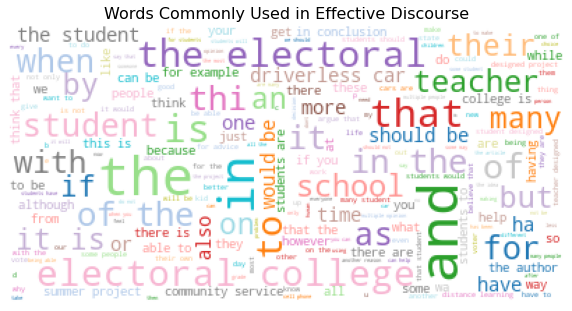

In [62]:
wc_effective = WordCloud(background_color="white", 
               max_font_size=40, 
               relative_scaling=0.6, 
               colormap = 'tab20',
              stopwords = ['t', 'th', 'f', 'w', 'h', 's', 'i', 'o', 'a']).generate(effective_str)
plt.figure(figsize = (10, 10))
plt.imshow(wc_effective)
plt.title("Words Commonly Used in Effective Discourse", {'fontsize': 16})
plt.axis("off")
plt.show()

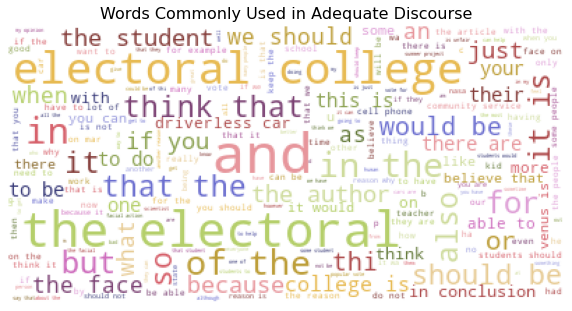

In [63]:
wc_adequate = WordCloud(background_color="white", 
               max_font_size=40, 
               relative_scaling= 0.6, 
               colormap = 'tab20b',
              stopwords = ['t', 'th', 'f', 'w', 'h', 's', 'i', 'o', 'a']).generate(adequate_str)
plt.figure(figsize = (10, 10))
plt.imshow(wc_adequate)
plt.title("Words Commonly Used in Adequate Discourse", {'fontsize': 16})
plt.axis("off")
plt.show()

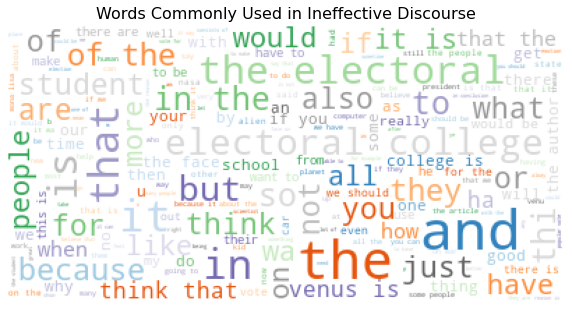

In [64]:
wc_ineffective = WordCloud(background_color="white", 
               max_font_size=40, 
               relative_scaling= 0.6, 
               colormap = 'tab20c',
              stopwords = ['t', 'th', 'f', 'w', 'h', 's', 'i', 'o', 'a']).generate(ineffective_str)
plt.figure(figsize = (10, 10))
plt.imshow(wc_ineffective)
plt.title("Words Commonly Used in Ineffective Discourse", {'fontsize': 16})
plt.axis("off")
plt.show()